# 🍊🗿제주 특산물 가격 예측

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import pyproj
import matplotlib.pyplot as plt
import re

In [270]:
path1 = '/content/drive/MyDrive/셩 코딩 연습/data/jeju/train.csv'
path2 = '/content/drive/MyDrive/셩 코딩 연습/data/jeju/international_trade.csv'
path3 = '/content/drive/MyDrive/셩 코딩 연습/data/jeju/sample_submission.csv'
path4 = '/content/drive/MyDrive/셩 코딩 연습/data/jeju/test.csv'

In [271]:
df = pd.read_csv(path1)
df_i = pd.read_csv(path2)  #수출입 정보
df_s = pd.read_csv(path3)
df_t = pd.read_csv(path4)

- TG : 감귤
- BC : 브로콜리
- RD : 무
- CR : 당근
- CB : 양배추

In [272]:
df_i['품목명'].unique()

array(['토마토(신선한 것이나 냉장한 것으로 한정한다)', '양파', '쪽파', '꽃양배추와 브로콜리(broccoli)',
       '방울다다기 양배추', '양배추', '결구(結球) 상추',
       '위트루프 치커리(Witloof chicory)[시코리엄 인티부스 변종 포리오섬(Cichorium intybus var. foliosum)]',
       '당근', '오이류(신선한 것이나 냉장한 것으로 한정한다)',
       '콩[비그나(Vigna)속ㆍ파세러스(Phaseolus)속)]', '대추야자', '무화과', '파인애플',
       '망고(mango)', '망고스틴(mangosteen)', '오렌지', '감귤',
       '그레이프프루트(grapefruit)와 포멜로(pomelo)',
       '레몬[시트러스 리몬(Citrus limon)ㆍ시트러스 리머늄(Citrus limonum)]', '수박',
       '포포(papaw)[파파야(papaya)]', '사과', '배', '자두',
       '완두[피섬 새티범(Pisum sativum)]', '구아바(guava)', '살구',
       '신 체리[프루너스 체라서스(Prunus cerasus)]', '복숭아[넥터린(nectarine)을 포함한다]',
       '순무', '방울토마토', '샬롯(shallot)', '참외'], dtype=object)

In [273]:
df = df.rename({'supply(kg)':'supply',
                'price(원/kg)':'price'}, axis = 'columns')
df.head(3)

,ID,timestamp,item,corporation,location,supply,price
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0


In [275]:
df[df['price'] == 20909]

,ID,timestamp,item,corporation,location,supply,price
7304,TG_C_J_20220427,2022-04-27,TG,C,J,55.0,20909.0


In [ ]:
df[df['price'] == 20909]

In [274]:
df_i[df_i['품목명'] == '양배추']

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
5,2019-01,양배추,184650,94,395802,90,4
30,2019-02,양배추,182636,69,336142,77,-8
53,2019-03,양배추,854925,354,356514,94,260
77,2019-04,양배추,6494616,2658,343463,105,2553
101,2019-05,양배추,1461639,662,270972,95,567
128,2019-06,양배추,3286366,1656,271444,69,1586
155,2019-07,양배추,1676629,798,472041,119,679
182,2019-08,양배추,2465625,1154,280140,73,1081
209,2019-09,양배추,1187087,566,226329,60,507
237,2019-10,양배추,201297,105,635187,151,-46


In [ ]:
df_i[df_i['품목명'] == '감귤']

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
17,2019-01,감귤,58368,172,0,0,172
41,2019-02,감귤,8474,33,0,0,33
64,2019-03,감귤,2061,10,4599,12,-2
88,2019-04,감귤,328,9,13457,36,-27
114,2019-05,감귤,2560,21,0,0,21
140,2019-06,감귤,3417,21,0,0,21
167,2019-07,감귤,4603,27,0,0,27
194,2019-08,감귤,5859,31,0,0,31
223,2019-09,감귤,8050,39,0,0,39
248,2019-10,감귤,3651,14,0,0,14


In [ ]:
df_i[df_i['품목명'] == '브로콜리']

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지


In [ ]:
df_i[df_i['품목명'] == '순무']

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
536,2020-10,순무,450,8,0,0,8
681,2021-04,순무,577,0,0,0,0
705,2021-05,순무,312,0,0,0,0
732,2021-06,순무,130,0,0,0,0
861,2021-11,순무,0,0,1,0,0
1254,2023-02,순무,4000,4,2,0,4


In [ ]:
df_i[df_i['품목명'] == '당근']

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
8,2019-01,당근,23150,22,7466150,2955,-2934
33,2019-02,당근,16250,16,6524716,2600,-2585
56,2019-03,당근,17960,13,13353720,4953,-4941
80,2019-04,당근,16910,14,8323700,3493,-3479
104,2019-05,당근,18000,16,4897803,2160,-2144
130,2019-06,당근,19500,14,7853590,3601,-3587
158,2019-07,당근,17000,11,9570280,3817,-3806
185,2019-08,당근,18547,12,7232500,2690,-2679
212,2019-09,당근,15575,10,10404140,3839,-3829
240,2019-10,당근,17596,11,10531000,3151,-3139


In [ ]:
df_i.columns

Index(['기간', '품목명', '수출 중량', '수출 금액', '수입 중량', '수입 금액', '무역수지'], dtype='object')

## EDA

In [ ]:
drop_columns = ['수출 중량', '수출 금액', '수입 중량', '수입 금액']
df_i = df_i.drop(columns = drop_columns)
df_i.head(3)

,기간,품목명,무역수지
0,2019-01,토마토(신선한 것이나 냉장한 것으로 한정한다),990
1,2019-01,양파,-896
2,2019-01,쪽파,-127


In [ ]:
df_i = df_i[df_i['품목명'].str.contains(r'감귤|브로콜리|당근|양배추')]
df_i.head(3)

,기간,품목명,무역수지
3,2019-01,꽃양배추와 브로콜리(broccoli),-562
4,2019-01,방울다다기 양배추,-38
5,2019-01,양배추,4


In [ ]:
df_i['품목명'].unique()

array(['꽃양배추와 브로콜리(broccoli)', '방울다다기 양배추', '양배추', '당근', '감귤'],
      dtype=object)

In [ ]:
df_i['품목명'] = df_i['품목명'].replace('감귤', 'TG')
df_i['품목명'] = df_i['품목명'].replace('브로콜리', 'BC')
df_i['품목명'] = df_i['품목명'].replace('꽃양배추와 브로콜리(broccoli)', 'BC')
df_i['품목명'] = df_i['품목명'].replace('양배추', 'CB')
df_i['품목명'] = df_i['품목명'].replace('당근', 'CR')

df_i

,기간,품목명,무역수지
3,2019-01,BC,-562
4,2019-01,방울다다기 양배추,-38
5,2019-01,CB,4
8,2019-01,CR,-2934
17,2019-01,TG,172
...,...,...,...
1248,2023-02,BC,-352
1249,2023-02,방울다다기 양배추,-55
1250,2023-02,CB,-91
1253,2023-02,CR,-3737


In [ ]:
drop_index = df_i[df_i['품목명'] == '방울다다기 양배추'].index
df_i = df_i.drop(drop_index)
df_i.head()

,기간,품목명,무역수지
3,2019-01,BC,-562
5,2019-01,CB,4
8,2019-01,CR,-2934
17,2019-01,TG,172
28,2019-02,BC,-398


In [ ]:
df_i['품목명'].unique()

array(['BC', 'CB', 'CR', 'TG'], dtype=object)

In [ ]:
import datetime

In [ ]:
df_i = df_i.rename({'기간':'timestamp',
                '품목명':'item'}, axis = 'columns')
df_i.head()

,timestamp,item,무역수지
3,2019-01,BC,-562
5,2019-01,CB,4
8,2019-01,CR,-2934
17,2019-01,TG,172
28,2019-02,BC,-398


In [ ]:
df_i['timestamp'] = df_i['timestamp'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m'))
df_i['year'] = df_i['timestamp'].apply(lambda x: x.year)
df_i['month'] = df_i['timestamp'].apply(lambda x: x.month)
df_i.head()

,timestamp,item,무역수지,year,month
3,2019-01-01,BC,-562,2019,1
5,2019-01-01,CB,4,2019,1
8,2019-01-01,CR,-2934,2019,1
17,2019-01-01,TG,172,2019,1
28,2019-02-01,BC,-398,2019,2


In [ ]:
df_i = df_i.drop(['timestamp'], axis=1)
df_i.head()

,item,무역수지,year,month
3,BC,-562,2019,1
5,CB,4,2019,1
8,CR,-2934,2019,1
17,TG,172,2019,1
28,BC,-398,2019,2


In [ ]:
#df_i.to_csv('df_i.csv')

In [ ]:
df['timestamp'] = df['timestamp'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
df['year'] = df['timestamp'].apply(lambda x: x.year)
df['month'] = df['timestamp'].apply(lambda x: x.month)
df['day'] = df['timestamp'].apply(lambda x: x.day)
df.head()

,ID,timestamp,item,corporation,location,supply,price,year,month,day
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1,2
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5


In [ ]:
df = pd.merge(df, df_i, how='outer')
df

,ID,timestamp,item,corporation,location,supply,price,year,month,day,무역수지
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1,172.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1,2,172.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3,172.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4,172.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5,172.0
...,...,...,...,...,...,...,...,...,...,...,...
59392,BC_E_J_20230302,2023-03-02,BC,E,J,2984.0,3144.0,2023,3,2,NaN
59393,BC_E_J_20230303,2023-03-03,BC,E,J,4920.0,3045.0,2023,3,3,NaN
59394,BC_E_S_20230301,2023-03-01,BC,E,S,2160.0,3816.0,2023,3,1,NaN
59395,BC_E_S_20230302,2023-03-02,BC,E,S,1152.0,3321.0,2023,3,2,NaN


In [ ]:
import holidays

In [ ]:
def add_weekday(df) :
    df['date'] = pd.to_datetime(df['timestamp'])
    df['weekcode'] = df['date'].dt.weekday

    year_min = df['date'].dt.date.unique().min().year
    year_max = df['date'].dt.date.unique().max().year
    kor_holidays = list(holidays.KOR(years=range(year_min, year_max)).keys())
    idx_kor_holidays = pd.to_datetime(kor_holidays)

    df_temp = df[['date', 'weekcode']].copy()
    df_temp.set_index('date', inplace=True)
    df_temp.loc[idx_kor_holidays, 'weekcode'] = 10
    df_temp.reset_index(inplace=True)

    df['weekcode'] = df_temp['weekcode']
    return df

df = add_weekday(df)
df

,ID,timestamp,item,corporation,location,supply,price,year,month,day,무역수지,date,weekcode
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1,172.0,2019-01-01,10
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1,2,172.0,2019-01-02,2
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3,172.0,2019-01-03,3
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4,172.0,2019-01-04,4
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5,172.0,2019-01-05,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59392,BC_E_J_20230302,2023-03-02,BC,E,J,2984.0,3144.0,2023,3,2,NaN,2023-03-02,3
59393,BC_E_J_20230303,2023-03-03,BC,E,J,4920.0,3045.0,2023,3,3,NaN,2023-03-03,4
59394,BC_E_S_20230301,2023-03-01,BC,E,S,2160.0,3816.0,2023,3,1,NaN,2023-03-01,2
59395,BC_E_S_20230302,2023-03-02,BC,E,S,1152.0,3321.0,2023,3,2,NaN,2023-03-02,3


In [ ]:
df['holiday'] = df['weekcode'].apply(lambda x: 0 if x < 5 else 1)

#1 : 일요일, 공휴일 (거래 X)

In [ ]:
df

,ID,timestamp,item,corporation,location,supply,price,year,month,day,무역수지,date,weekcode,holiday
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1,172.0,2019-01-01,10,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1,2,172.0,2019-01-02,2,0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3,172.0,2019-01-03,3,0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4,172.0,2019-01-04,4,0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5,172.0,2019-01-05,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59392,BC_E_J_20230302,2023-03-02,BC,E,J,2984.0,3144.0,2023,3,2,NaN,2023-03-02,3,0
59393,BC_E_J_20230303,2023-03-03,BC,E,J,4920.0,3045.0,2023,3,3,NaN,2023-03-03,4,0
59394,BC_E_S_20230301,2023-03-01,BC,E,S,2160.0,3816.0,2023,3,1,NaN,2023-03-01,2,0
59395,BC_E_S_20230302,2023-03-02,BC,E,S,1152.0,3321.0,2023,3,2,NaN,2023-03-02,3,0


In [ ]:
df.isnull().sum()

#무역수지 na : 12277 / 59397

ID                 0
timestamp          0
item               0
corporation        0
location           0
supply             0
price              0
year               0
month              0
day                0
무역수지           12277
date               0
weekcode           0
holiday            0
dtype: int64

In [ ]:
df = df.fillna(0)

In [ ]:
df.isnull().sum()

ID             0
timestamp      0
item           0
corporation    0
location       0
supply         0
price          0
year           0
month          0
day            0
무역수지           0
date           0
weekcode       0
holiday        0
dtype: int64

In [ ]:
df

,ID,timestamp,item,corporation,location,supply,price,year,month,day,무역수지,date,weekcode,holiday
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1,172.0,2019-01-01,10,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1,2,172.0,2019-01-02,2,0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3,172.0,2019-01-03,3,0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4,172.0,2019-01-04,4,0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5,172.0,2019-01-05,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59392,BC_E_J_20230302,2023-03-02,BC,E,J,2984.0,3144.0,2023,3,2,0.0,2023-03-02,3,0
59393,BC_E_J_20230303,2023-03-03,BC,E,J,4920.0,3045.0,2023,3,3,0.0,2023-03-03,4,0
59394,BC_E_S_20230301,2023-03-01,BC,E,S,2160.0,3816.0,2023,3,1,0.0,2023-03-01,2,0
59395,BC_E_S_20230302,2023-03-02,BC,E,S,1152.0,3321.0,2023,3,2,0.0,2023-03-02,3,0


In [ ]:
columns_to_drop = ['weekcode', 'date','무역수지']
df = df.drop(columns = columns_to_drop)

In [ ]:
df

,ID,timestamp,item,corporation,location,supply,price,year,month,day,holiday
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1,2,0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3,0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4,0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...
59392,BC_E_J_20230302,2023-03-02,BC,E,J,2984.0,3144.0,2023,3,2,0
59393,BC_E_J_20230303,2023-03-03,BC,E,J,4920.0,3045.0,2023,3,3,0
59394,BC_E_S_20230301,2023-03-01,BC,E,S,2160.0,3816.0,2023,3,1,0
59395,BC_E_S_20230302,2023-03-02,BC,E,S,1152.0,3321.0,2023,3,2,0


In [ ]:
df.to_csv('df_holiday2.csv',index=False)

#EDA

In [ ]:
df.groupby("corporation")['item'].unique()

corporation
A    [TG, CR, CB, RD, BC]
B            [TG, CR, BC]
C        [TG, CR, RD, BC]
D    [TG, CR, CB, RD, BC]
E    [TG, CR, CB, RD, BC]
F                [CB, RD]
Name: item, dtype: object

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

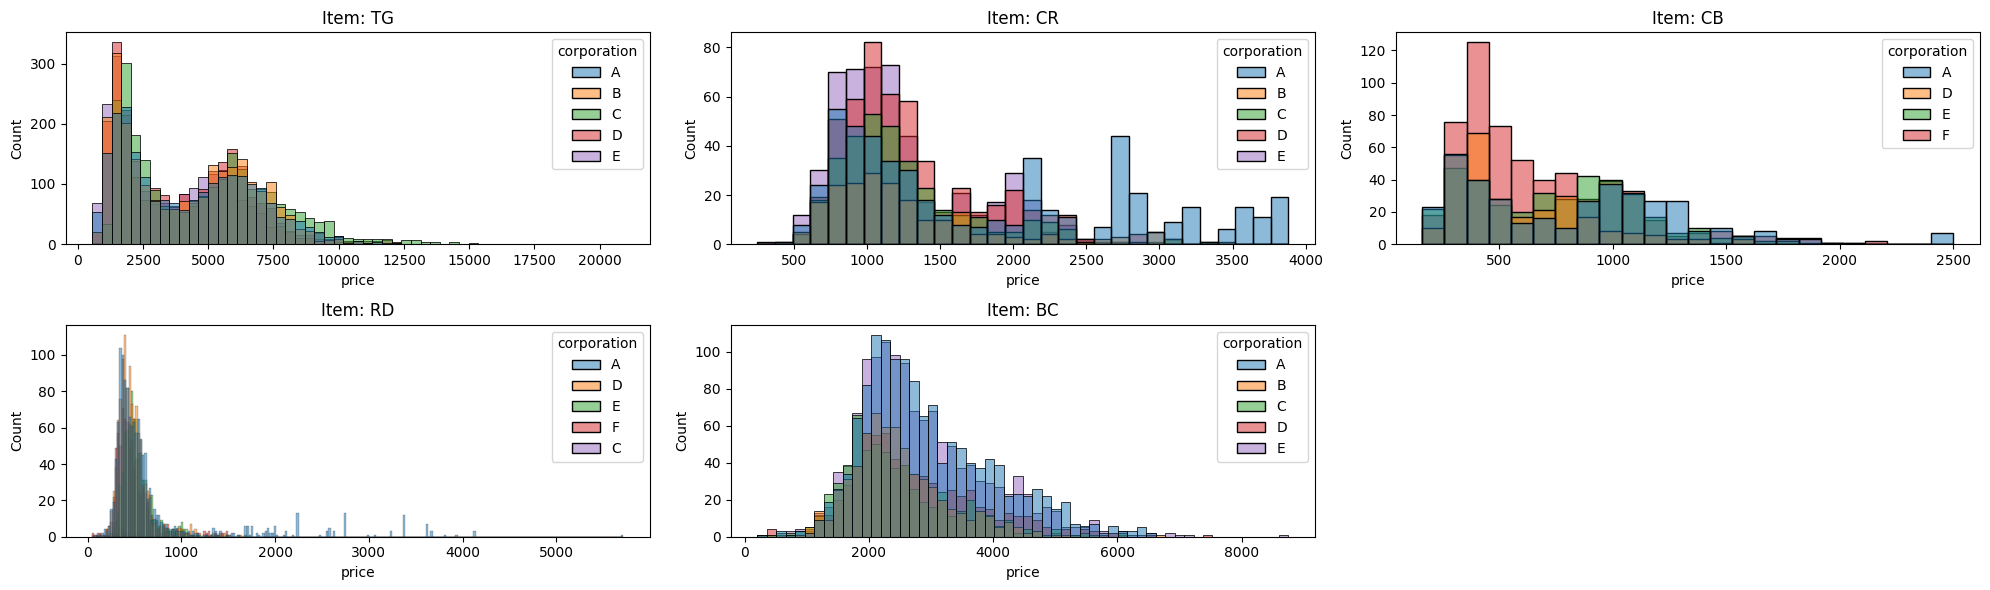

In [ ]:
# 서브플롯 생성
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 6))

# train_df의 item 열에서 고유한 값을 가져와서 반복
unique_items = df['item'].unique()
for i, item in enumerate(unique_items):
    row, col = i // 3, i % 3  # 행 및 열 위치 계산
    current_ax = ax[row, col]  # 현재 서브플롯 얻기

    # item 및 price(원/kg) 필터링
    filtered_data = df[(df['item'] == item) & (df['price'] != 0)]

    # seaborn을 사용하여 히스토그램 그리기
    sns.histplot(data=filtered_data, x='price', hue='corporation', ax=current_ax)

    current_ax.set_title(f'Item: {item}')

# 불필요한 서브플롯 숨기기
for i in range(len(unique_items), 6):
    row, col = i // 3, i % 3
    ax[row, col].axis('off')

# 서브플롯 간 간격 조정
plt.tight_layout()

# 그래프 표시
plt.show()

## 무역수지 - 특산품 매칭

## item 별 기업별로 ANOVA 검정 (각 회사 마다 특산물 평균 차이가 있는지?)
- h0 : 각 특산물이 회사별로 가격의 평균은 같다.
- h1 : 각 특산물이 회사별로 가격의 평균은 다르다.

In [ ]:
#!pip install scipy

In [ ]:
from scipy.stats import bartlett, f_oneway

In [ ]:
tangerines_df = df[(df['item'] == 'TG')]

In [ ]:
tanger_A = tangerines_df[(tangerines_df['corporation'] == "A")]
tanger_B = tangerines_df[(tangerines_df['corporation'] == "B")]
tanger_C = tangerines_df[(tangerines_df['corporation'] == "C")]
tanger_D = tangerines_df[(tangerines_df['corporation'] == "D")]
tanger_E = tangerines_df[(tangerines_df['corporation'] == "E")]
tanger_F = tangerines_df[(tangerines_df['corporation'] == "F")] #-> 감귤을 판매하지 않는 회사임

In [ ]:
## 정규성 검정 - 중심극한 정리에 의헤 표본이 충분하여 정규성을 띈다고 가정
for i in [tanger_A,tanger_B, tanger_C, tanger_D, tanger_E, tanger_F]:
    print(len(i))

3046
3046
3046
3046
3046
0


In [ ]:
## 등분산성 검정 - 5개의 집단[a,b,c,d,e]에서 유의 수준이 0.05이하이므로 귀무 가설을 기각 -> 5개의 집단이 등 분산을 가진다.
format(bartlett(tanger_A['price'],tanger_B['price'],tanger_C['price'],tanger_D['price'],tanger_E['price']).pvalue, "0.4f")

'0.0000'

In [ ]:
## ANOVA 검정 진행
print(f_oneway(tanger_A['price'],tanger_B['price'],tanger_C['price'],tanger_D['price'],tanger_E['price']))
print(format(f_oneway(tanger_A['price'],tanger_B['price'],tanger_C['price'],tanger_D['price'],tanger_E['price']).pvalue, "0.4f"))

F_onewayResult(statistic=66.90677797120743, pvalue=3.2553512298358677e-56)
0.0000


ANOVA 검정 결과 유의수준 0.05 이하이므로, 감귤이라는 특산품의 평균 판매 금액은 각 회사마다 같은 가격을 가지고 있다

# 시각화를 통한 인사이트 도출

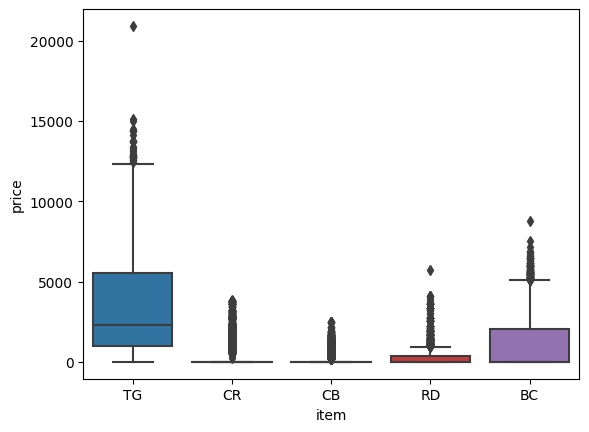

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='item',y='price',data=df)
plt.show()

귤 가격 중 너무 비싼 이상치 확인

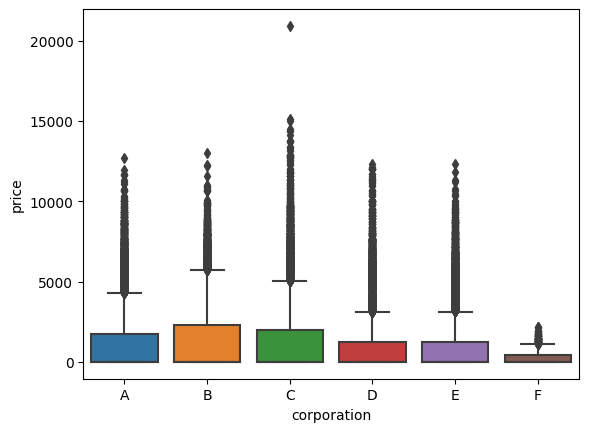

In [ ]:
sns.boxplot(x='corporation',y='price',data=df)
plt.show()

c 기업 중 가격 이상치 확인

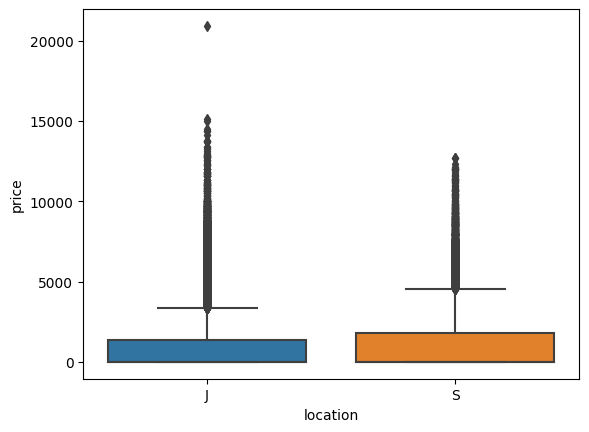

In [ ]:
sns.boxplot(x='location',y='price',data=df)
plt.show()

In [ ]:
df

,ID,timestamp,item,corporation,location,supply,price,year,month,day,holiday
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1,2,0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3,0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4,0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...
59392,BC_E_J_20230302,2023-03-02,BC,E,J,2984.0,3144.0,2023,3,2,0
59393,BC_E_J_20230303,2023-03-03,BC,E,J,4920.0,3045.0,2023,3,3,0
59394,BC_E_S_20230301,2023-03-01,BC,E,S,2160.0,3816.0,2023,3,1,0
59395,BC_E_S_20230302,2023-03-02,BC,E,S,1152.0,3321.0,2023,3,2,0


<Axes: xlabel='month', ylabel='price'>

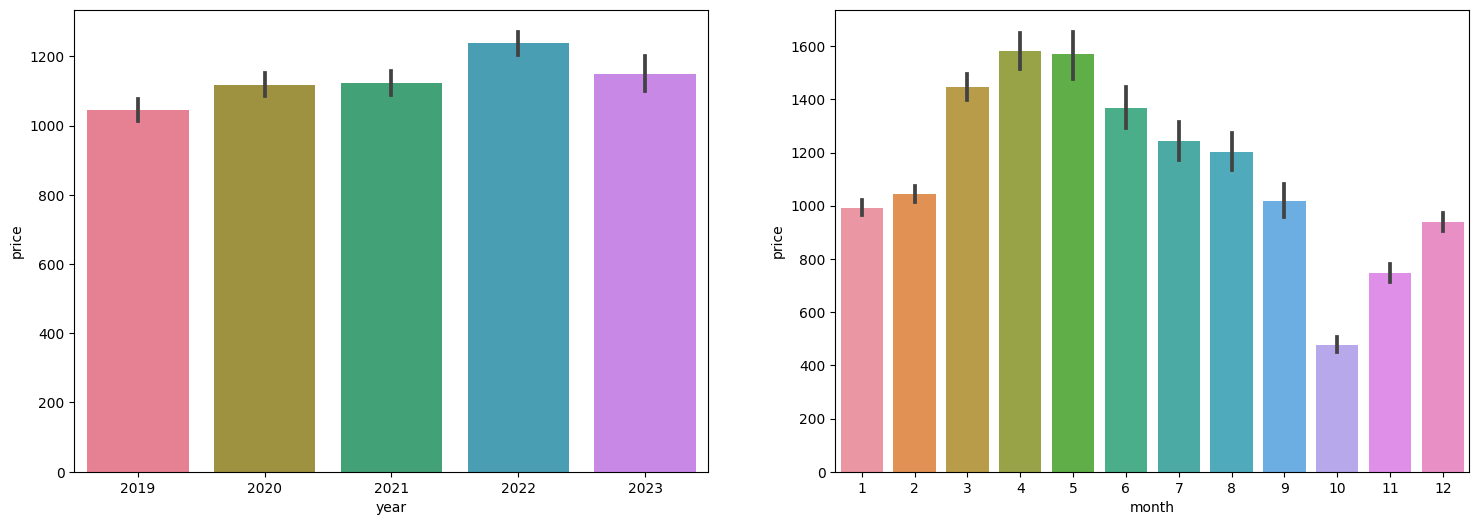

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(data=df,x='year',y='price',ax=axes[0],palette='husl')
sns.barplot(data=df,x='month',y='price',ax=axes[1])

4~5월에 가격이 높은 것을 확인

In [ ]:
df['holiday'].value_counts()

0    40521
1    18876
Name: holiday, dtype: int64

<Axes: xlabel='location', ylabel='price'>

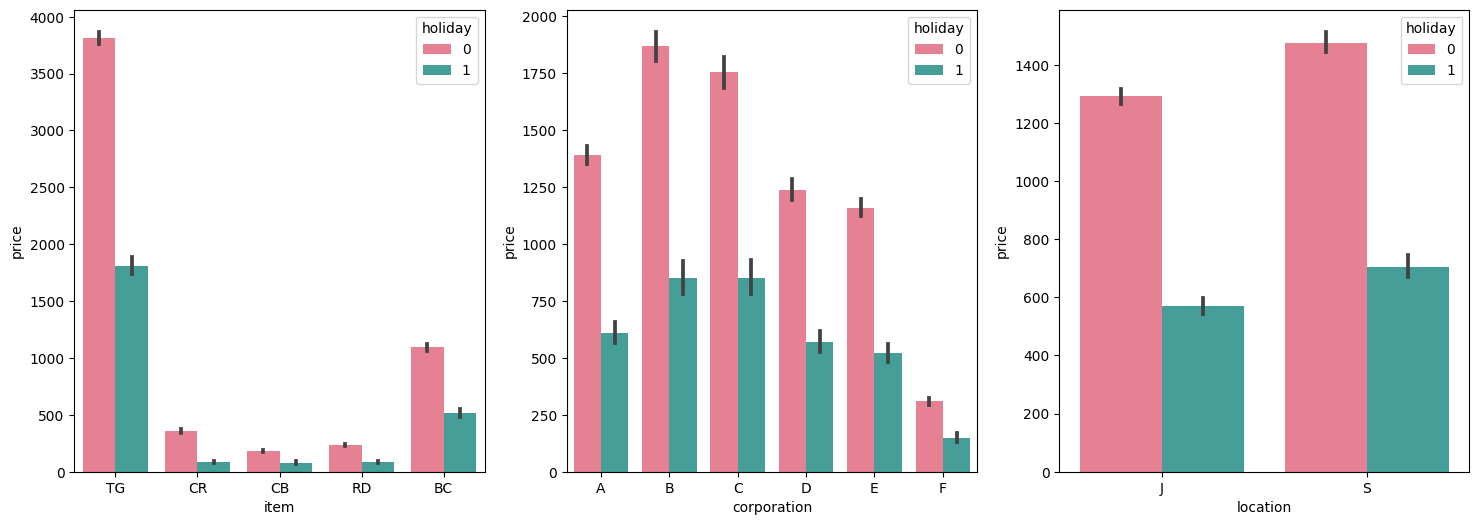

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(data=df,x='item',y='price',hue='holiday',ax=axes[0],palette='husl')
sns.barplot(data=df,x='corporation',y='price',hue='holiday',ax=axes[1],palette='husl')
sns.barplot(data=df,x='location',y='price',hue='holiday',ax=axes[2],palette='husl')

법정 휴일이냐 아니냐에 따라 차이 있음
-> 아마도 판매를 안하기 때문에 적게 나온것이 아닐까

<ipython-input-238-0f80e1009399>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Reds')


<Axes: >

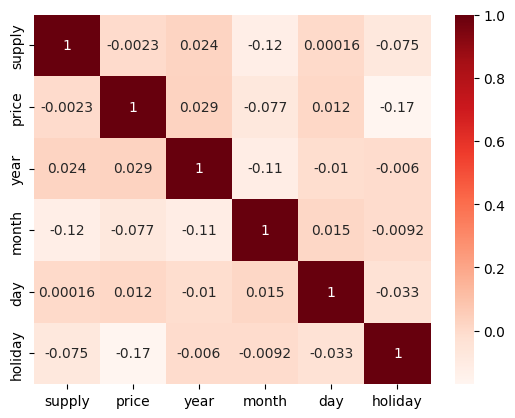

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='Reds')

가격과의 관계가 그렇게 높지 않음

### 특산물 별

In [ ]:
df1= pd.pivot_table(df,index='item',values='price',aggfunc='sum') #합계 (계산을 어떻게 할지)
df1['비율'] = (df1['price']/df1['price'].sum())*100
df1

,price,비율
item,,
BC,12476065.0,18.560481
CB,1158905.0,1.724088
CR,2911721.0,4.331730
RD,2279304.0,3.390891
TG,48392442.0,71.992811


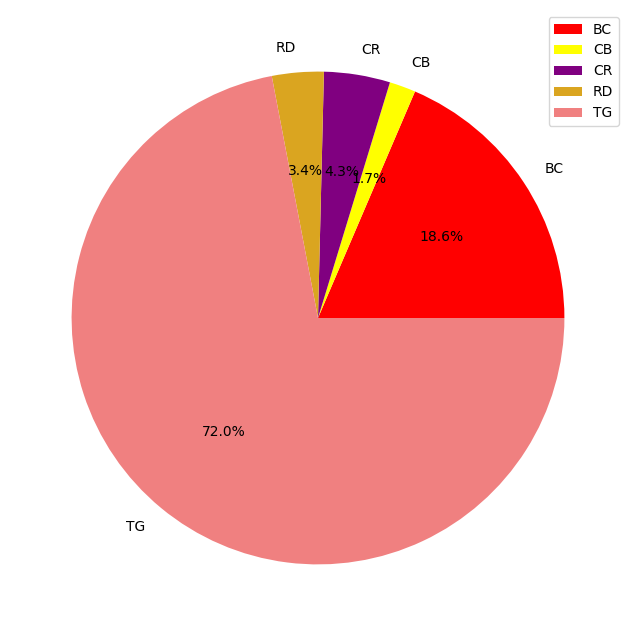

In [ ]:
plt.figure(figsize=(10,8))
colors = ['red','yellow','purple','goldenrod','lightcoral']
plt.rc('font',family='Malgun Gothic')
# TG : 감귤 BC : 브로콜리 RD : 무 CR : 당근 CB : 양배추
plt.pie(data = df1,x = 'price',labels=df1.index,autopct=lambda x : '{:.1f}%'.format(x),colors=colors)
plt.legend()
plt.show()

귤의 가격 비율이 가장 높음

### 기업별

In [ ]:
df2 = pd.pivot_table(df,index='corporation',values='price',aggfunc='sum')
df2['비율'] = (df2['price']/df2['price'].sum())*100
df2

,price,비율
corporation,,
A,15649343.0,23.281325
B,11763166.0,17.499910
C,13418396.0,19.962374
D,12490909.0,18.582564
E,13107338.0,19.499617
F,789285.0,1.174209


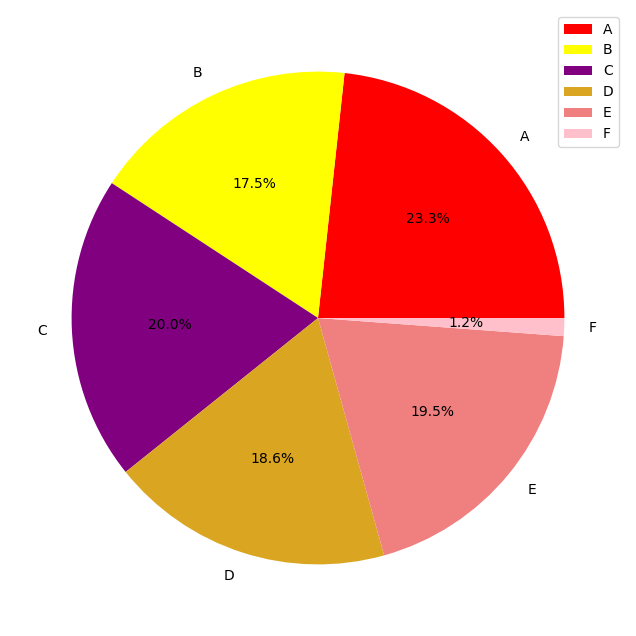

In [ ]:
plt.figure(figsize=(10,8))
colors = ['red','yellow','purple','goldenrod','lightcoral','pink']
plt.rc('font',family='Malgun Gothic')
# TG : 감귤 BC : 브로콜리 RD : 무 CR : 당근 CB : 양배추
plt.pie(data = df2,x = 'price',labels=df2.index,autopct=lambda x : '{:.1f}%'.format(x),colors=colors)
plt.legend()
plt.show()

f 기업 외엔 비슷비슷 하나 A가 가장 높음

### 지역별

In [ ]:
df3 = pd.pivot_table(df,index='location',values='price',aggfunc='sum')
df3['비율'] = (df3['price']/df3['price'].sum())*100
df3

,price,비율
location,,
J,37213110.0,55.361463
S,30005327.0,44.638537


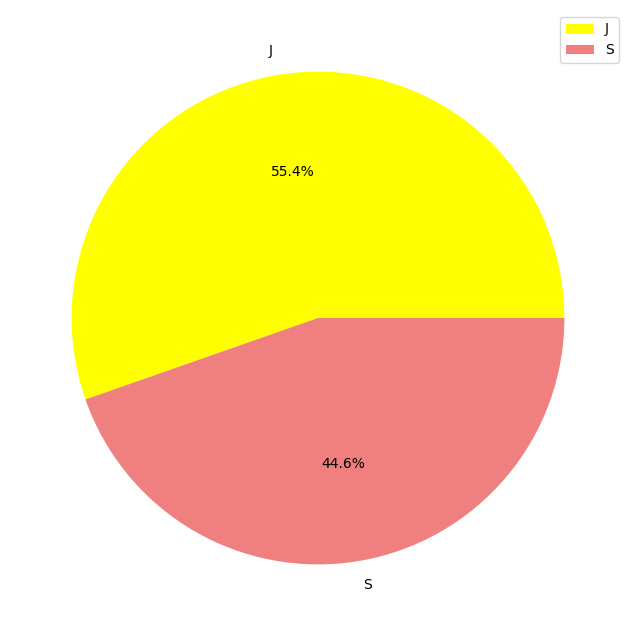

In [ ]:
plt.figure(figsize=(10,8))
colors = ['yellow','lightcoral']
plt.rc('font',family='Malgun Gothic')
# TG : 감귤 BC : 브로콜리 RD : 무 CR : 당근 CB : 양배추
plt.pie(data = df3,x = 'price',labels=df3.index,autopct=lambda x : '{:.1f}%'.format(x),colors=colors)
plt.legend()
plt.show()

## 이상치 확인

<Axes: ylabel='price'>

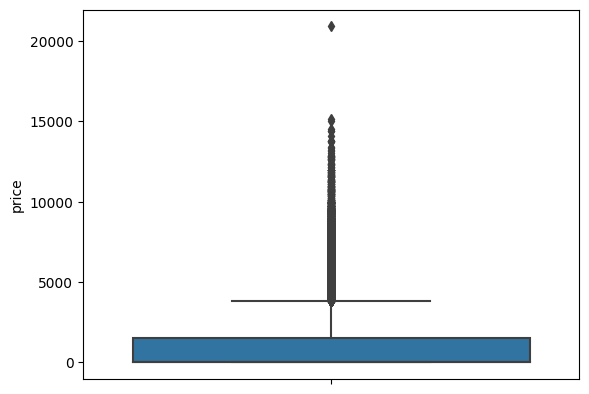

In [ ]:
sns.boxplot(y='price',data=df)

In [ ]:
#!pip install outliers

In [ ]:
from collections import Counter

def outlier(df,n,cols):
    outs = []
    for col in cols :
        Q1 = np.percentile(df[col],25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1

        step = 1.5*IQR
        indexes = df[(df[col] < Q1 - step)|(df[col] > Q3 + step)].index
        outs.extend(indexes)
    outs = Counter(outs)
    res = [k for k,v in outs.items() if v > n]
    return res

In [ ]:
outlier_col = ['price']
outlier(df,1,outlier_col)

[]

In [ ]:
df['price'].describe()

count    59397.000000
mean      1131.680674
std       2029.941445
min          0.000000
25%          0.000000
50%          0.000000
75%       1519.000000
max      20909.000000
Name: price, dtype: float64

In [ ]:
 # max 값인 20909.000000 을 지워주고 싶었으나 코드에서 정해주지 않았기 때문에 제거는 안해줄 것임.

In [ ]:
# 20909.000000 없애줄 것임
df['price'] = df['price'].drop(20909)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59397 entries, 0 to 59396
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           59397 non-null  object        
 1   timestamp    59397 non-null  datetime64[ns]
 2   item         59397 non-null  object        
 3   corporation  59397 non-null  object        
 4   location     59397 non-null  object        
 5   supply       59397 non-null  float64       
 6   price        59396 non-null  float64       
 7   year         59397 non-null  int64         
 8   month        59397 non-null  int64         
 9   day          59397 non-null  int64         
 10  holiday      59397 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 7.5+ MB


In [ ]:
df['price'] = df['price'].fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59397 entries, 0 to 59396
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           59397 non-null  object        
 1   timestamp    59397 non-null  datetime64[ns]
 2   item         59397 non-null  object        
 3   corporation  59397 non-null  object        
 4   location     59397 non-null  object        
 5   supply       59397 non-null  float64       
 6   price        59397 non-null  float64       
 7   year         59397 non-null  int64         
 8   month        59397 non-null  int64         
 9   day          59397 non-null  int64         
 10  holiday      59397 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 7.5+ MB


In [ ]:
#법정휴일데이터만 dfdf
dfdf = df[df['holiday'] == 1] #18876개
dfdf

,ID,timestamp,item,corporation,location,supply,price,year,month,day,holiday
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1,1
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5,1
5,TG_A_J_20190106,2019-01-06,TG,A,J,0.0,0.0,2019,1,6,1
11,TG_A_J_20190112,2019-01-12,TG,A,J,35488.0,1374.0,2019,1,12,1
12,TG_A_J_20190113,2019-01-13,TG,A,J,0.0,0.0,2019,1,13,1
...,...,...,...,...,...,...,...,...,...,...,...
59353,BC_E_S_20230212,2023-02-12,BC,E,S,0.0,0.0,2023,2,12,1
59359,BC_E_S_20230218,2023-02-18,BC,E,S,2976.0,2268.0,2023,2,18,1
59360,BC_E_S_20230219,2023-02-19,BC,E,S,0.0,0.0,2023,2,19,1
59366,BC_E_S_20230225,2023-02-25,BC,E,S,1032.0,2353.0,2023,2,25,1


In [ ]:
items = df['item'].value_counts().index.to_list()
items

['TG', 'BC', 'RD', 'CR', 'CB']

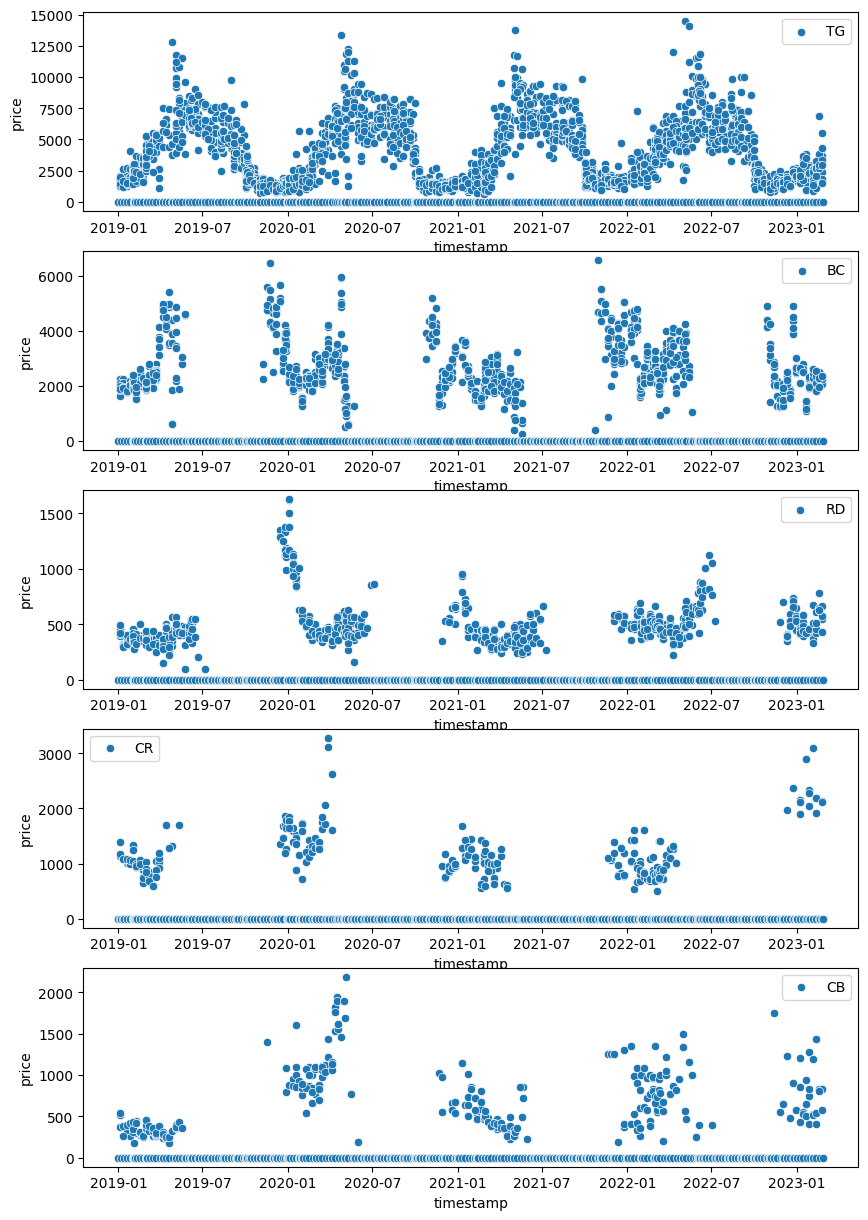

In [ ]:
fig, axes = plt.subplots(5,1,figsize=(10,15))
for i in range(len(items)):
    r = i%5
    sns.scatterplot(data = dfdf[dfdf['item']==items[i]], x = 'timestamp',y='price',ax=axes[r],label=items[i])

법정 휴일에도 과일 판매는 진행되기 때문에

holiday 컬럼은 의미가 없음.